# This notebook is created to practice common used hypothesis test technique

1. Z-test
2. T-test
3. Wilcoxon signed rank test.
4. Rank-Sum test
5. Permutation test

See analysis of variance for other tests, F-test, Chi-square test, Pearson Chi-square test for goodness of fit.

## 1. Z-test
Z-test is used when test statistics follows a standard normal distribution $N(0, 1)$ or can be appriximated by $N(0, 1)$ at large sample size asymptotes ($n\to \infty$) under central limit theorem (CLT).

Example 1.1. (a one-sided Z-test): <br>
$H_0$: $X_1, X_2, ..., X_n$ are generated by a IID normal distribution $N(\mu_0, \sigma)$, where $\sigma$ is known.<br>
$H_1$: $X_1, X_2, ..., X_n$ are generated by a IID normal distribution $N(\mu_1>\mu_0, \sigma)$, where $\sigma$ is known.

Then, the test statistics $T=\frac{\sqrt(n)(\bar{X}-\mu_0)}{\sigma} \sim N(0, 1)$. We reject null hypothesis at significance level-$\alpha$ when $T>Z(\alpha)$

Example 1.2. (a two-sided Z-test): <br>
$H_0$: $X_1, X_2, ..., X_n$ are generated by a IID normal distribution $N(\mu_0, \sigma)$, where $\sigma$ is known.<br>
$H_1$: $X_1, X_2, ..., X_n$ are generated by a IID normal distribution $N(\mu_1\neq\mu_0, \sigma)$, where $\sigma$ is known.

In this case, while the alternative hypothesis is not fully specified because we don't know what $\mu_1$ is, the null hypothesis is fully specified because we know both $\mu_0$ and $\sigma$. Then, the test statistics $T=\frac{\sqrt(n)(\bar{X}-\mu_0)}{\sigma} \sim N(0, 1)$. We reject null hypothesis at significance level-$\alpha$ when $|T|>Z(\alpha/2)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

### Example. One sample two-tail Z test.

Test statistics T:  3.90252 and P-vale 0.00009520
Observed mean:  0.78050, 95% Confidence Interval for keeping H0: [-0.39199 ,  0.39199]


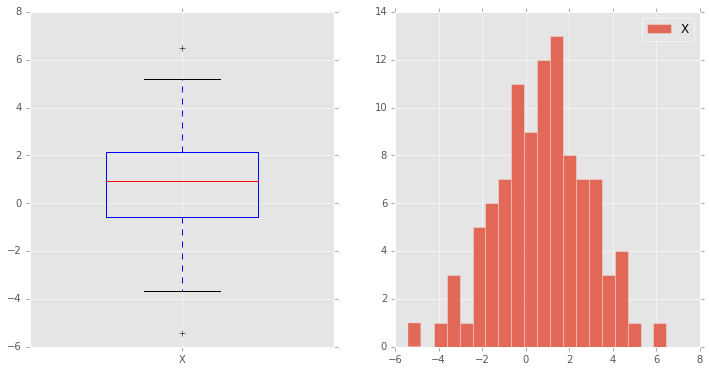

In [12]:
plt.style.use('ggplot')

def plot_dignostics_twosample(X0, X1, labels=['X0','X1']):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.boxplot([X0,X1], positions=[0, 1],labels=labels,widths=0.5)
    plt.subplot(1,2,2)
    plt.hist(X0,alpha=0.8)
    plt.hist(X1,alpha=0.8)
    plt.legend(labels)

def plot_dignostics_onesample(X, labels=['X'],bins=20):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.boxplot([X],labels=labels,widths=0.5)
    plt.subplot(1,2,2)
    plt.hist(X,alpha=0.8, bins=bins)
    plt.legend(labels)

def zscore(alpha):
    return scipy.stats.norm.ppf(1-alpha)

def p_value(T):
    return (1-scipy.stats.norm.cdf(abs(T)))*2

N     = 100  # sample size
mu0   = 0    # mean, if H0 is true
mu1   = 1    # mean, if H1 is true
sigma = 2  # standard deviation
alpha = 0.05 # significance level.

# generate random samples.
X0 = np.random.normal(loc=mu0, scale=sigma, size=N) # sample that follows null hypothesis.
X1 = np.random.normal(loc=mu1, scale=sigma, size=N) # sample that follows alternative hypothesis.

#One sample two-tail Z test.
# calculate z-score
# testing H1
X = X1 
plot_dignostics_onesample(X)
se = sigma/np.sqrt(N)    # standard error, known
m = zscore(alpha/2)      # confidence margin determined by confidence level.

# test statistics
T = (np.mean(X) - mu0)/se

print('Test statistics T: %8.5f and P-vale %10.8f' % (T, p_value(T)))
print('Observed mean: %8.5f, 95%% Confidence Interval for keeping H0: [%8.5f , %8.5f]'%
      (np.mean(X), mu0-m*se, mu0 + m*se))

### Example. Two samples two-tail Z test.

Test statistics T: -6.55187 and P-vale 0.00000000
Observed difference in mean: -1.06992, 95% Confidence Interval for keeping H0: [-0.32006 ,  0.32006]


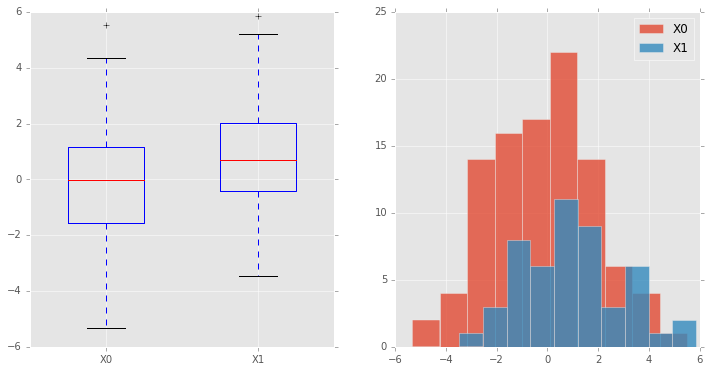

In [108]:
# Example. Two sample two-tail Z test
N1     = 100  # sample size
N2     = 50  # sample size
mu0   = 0    # mean, if H0 is true
mu1   = 1    # mean, if H1 is true
sigma = 2  # standard deviation
alpha = 0.05 # significance level.

# generate random samples.
X0 = np.random.normal(loc=mu0, scale=sigma, size=N1) # sample that follows null hypothesis.
X1 = np.random.normal(loc=mu1, scale=sigma, size=N2) # sample that follows alternative hypothesis.

#Two sample two-tail Z test.
# calculate z-score
# testing H1
plot_dignostics_twosample(X0,X1)
se = sigma/np.sqrt(N1 + N2)    # standard error, known
m = zscore(alpha/2)      # confidence margin determined by confidence level.

# test statistics
T = (np.mean(X0) - np.mean(X1))/se

print('Test statistics T: %8.5f and P-vale %10.8f' % (T, p_value(T)))
print('Observed difference in mean: %8.5f, 95%% Confidence Interval for keeping H0: [%8.5f , %8.5f]'%
      (np.mean(X0)-np.mean(X1), -m*se, m*se))

## 2. T test

$t$-test is used when test statistics follows a student $t$-distribution. This arises when testing distribution mean when distribution variance is unknown and has to be estimated from the sample. Each sample point is assumed to follow iid normal distribution. $t$-distribution converges to normal distribution when sample size is large.

Example 2.1. (a one sample (or paired) one-sided T-test, equal variance): <br>
$H_0$: $X_1, X_2, ..., X_n$ are generated by a IID normal distribution $N(\mu_0, \sigma)$, where $\sigma$ is unknown.<br>
$H_1$: $X_1, X_2, ..., X_n$ are generated by a IID normal distribution $N(\mu_1>\mu_0, \sigma)$, where $\sigma$ is unknown.

Unbiased estimate of $\sigma$ from sample $S$: 

$S^2=\frac{1}{n-1}\sum_{i}^{n} (X_i - \bar{X})^2$

There's a theorem (state without proof here) says $(n-1)S^2/\sigma^2 \sim \chi_{n-1}^2$

Using test statistics $T = \frac{\sqrt{n}(\bar{X}-\mu_0)}{S}$ follows a student $t$ distribution with degree of freedom $n-1$. This is because, the test statistics $T$ is indeed: 

$T = \frac{\sqrt{n}(\bar{X}-\mu_0)/\sigma}{S/\sigma} = \frac{\sqrt{n}(\bar{X}-\mu_0)/\sigma}{\sqrt{S^2/\sigma^2}}= \frac{N(0,1)}{\sqrt{\chi_{n-1}^{2}/(n-1)}}$

We know student t-distribution with $n$ degree of freedom is defined as $\frac{N(0,1)}{\sqrt{\chi_{n}^{2}/(n)}}$


Similarly, for two-sample ($X_n$ and $Y_m$) $t$-test with equal variance, the test statistics
$T = \frac{(\bar{X}-\bar{Y})}{S_p \sqrt{\frac{1}{n}+\frac{1}{m}}}$, where $S_p$ is the unbiased pooled standard error:

$S_p^2 = \frac{1}{m+n-2} \left(\sum_{i=1}^{n}(X_i-\bar{X})^2 + \sum_{j=1}^{m} (Y_j-\bar{Y})^2 \right)$

In this case, $\mu_0$, $\mu_1$, and $\sigma$ are all unknown.
This test also exploit the fact that $S_p^2$ follows a $\chi_{m+n-1}^2$


Test statistics T:  0.65192 and P-vale 0.51596349
Observed mean:  1.29779, 95% Confidence Interval for keeping H0: [-3.95002 ,  3.95002]


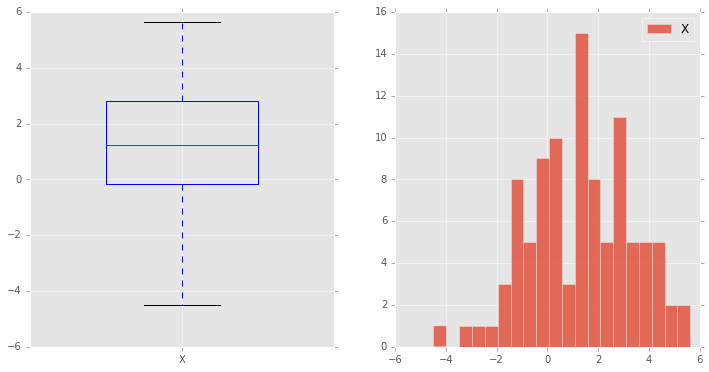

In [34]:
# One sample (paired) two tailed t-test

def tscore(alpha, df):
    return scipy.stats.t.ppf(1-alpha, df)

def p_value(T, df):
    return (1-scipy.stats.t.cdf(abs(T), df))*2

N     = 100  # sample size
mu0   = 0    # mean, if H0 is true
mu1   = 1    # mean, if H1 is true
sigma = 2  # standard deviation
alpha = 0.05 # significance level.

# generate random samples.
X0 = np.random.normal(loc=mu0, scale=sigma, size=N) # sample that follows null hypothesis.
X1 = np.random.normal(loc=mu1, scale=sigma, size=N) # sample that follows alternative hypothesis.

#One sample two-tail Z test.
# calculate z-score
# testing H1
df = N - 1
X = X1
plot_dignostics_onesample(X)
se = np.std(X, ddof=1)   # unbiased standard error, estimated from sample.
m = tscore(alpha/2, df)      # confidence margin determined by confidence level.

# test statistics
T = (np.mean(X) - mu0)/se

print('Test statistics T: %8.5f and P-vale %10.8f' % (T, p_value(T, df)))
print('Observed mean: %8.5f, 95%% Confidence Interval for keeping H0: [%8.5f , %8.5f]'%
      (np.mean(X), mu0-m*se, mu0 + m*se))

## 3. Wilcoxon signed rank test

Wilcoxon signed rank test is used in the following setting. Let's say we have one $n$-iid sample $X_1, X_2, ..., X_n \sim f$, where the __normality assumption is dropped!__ We have the following null and alternative hypothesis:<br>
$H_0$: $f$ is symmetric about 0<br>
$H_1$: $f$ is symmetric about $\mu$ for some $\mu>0$<br>
Because the shape of $f$ is arbitrary under $H_0$, the distribution of the $t$-statistic is no longer the same under every data distribution $P\in H_0$—in particular, __it can be very far from $t_{n-1}$ if $n$ is moderately small and $f$ is heavy-tailed__. We consider instead the __signed rank statistic__ $W_{+}$ defined in the following way:
1. Sort $|X_1|,|X_2|,..., |X_n|$ in increasing order. Assigne the smallest value (closest to zero) a rank of 1, the next smallest value a rank of 2, etc., and the largest value of a rank $n$
2. Define $W_{+}$ as the sum of the ranks corresponding to only the positive values of the $X_1, X_2, ..., X_n$.

As an example, suppose we have four observations $X_1=2, X_2=-4, X_3=-1, X_4=10$. Then the ranks of these four observations would be $2,3,1,4$. Observations $X_1$ and $X_4$ are positive, so $W_{+}=2+4=6$. We expect $W_{+}$ to be large under $H_{1}$ than under $H_0$ because high-rank observations are more likely to be positive under $H_1$. The test that rejects for large $W_{+}$ is called __Wilcoxon's signed rank test__. The following theorem states that $W_{+}$ has the same distribution under every $P \in H_0$, and provides a method for determining the null distribution and rejection threshold for $W_{+}$ when $n$ is large. (When $n$ is small, we can determine the exact null distribution of $W_{+}$ by computing $W_{+}$ for all $2^n$ possible combinations of $+$ and $-$ signs for the ranked data.)

__Theorem__ (Proof omitted here): _The distribution of $W_{+}$ is the same for every $PDF~f$ that is symmetric about 0. For large n, this distribution is approximately $N(\frac{n(n+1)}{4}, \frac{n(n+1)(2n+1)}{24})$. (More formally, $\sqrt{\frac{24}{n(n+1)(2n+1)}}(W_{+}-\frac{n(n+1)}{4})\to N(0, 1)$) in distribution as $n \to \infty$.

This test is powerful when the underlying distribution is not normal, where $t$-test can fail. The test essentially makes use of the symmetry that exists under null hypothesis. In this case, no matter what distribution $f$ is, the signs of $\pm X_1, \pm X_2, ..., \pm X_n$ given $|X_1|, |X_2|, ..., |X_n|$ are equally likely. Therefore, we can also use computer simulation to approximate the distribution $W_{+}$ even when n is large.

If normal distribution of $W_{+}$ is assumed, the sample size should be sufficiently large (ususally more than 20).

### 3.1 Example: compare $t$-test and wilcoxon sign rank test

Test the symmetry of distribution centered at zero when sample is generated from a cauchy distribution.
In this case, extreme values are much more likely to appear in the sample than the case where the unknown distribution is normal. The heavy tail of cauchy distribution makes both $t$-test and $z$-test fail. In fact, cauchy distribution doesn't have defined variance, which means the sample variance cannot accurately capture the spead-out of the distribution. However, in this case, Wilcoxon signed rank test is robust.

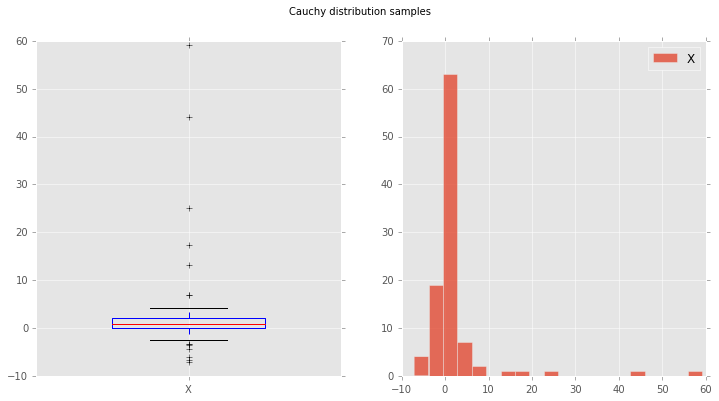

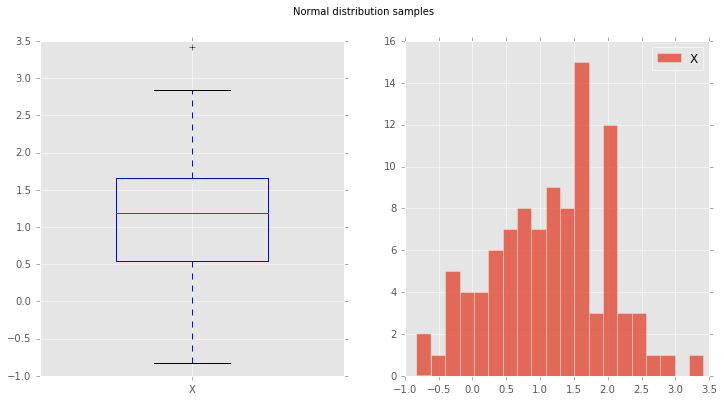

In [41]:
N     = 100
mu    = 1
sigma = 1

# generate samples from a cauchy distribution
X     = scipy.stats.cauchy.rvs(loc = mu, scale = sigma, size=N)
plot_dignostics_onesample(X,bins=20)
plt.suptitle('Cauchy distribution samples')

# generate samples from a normal distribution
Xn     = scipy.stats.norm.rvs(loc = mu, scale = sigma, size=N)
plot_dignostics_onesample(Xn,bins=20)
plt.suptitle('Normal distribution samples')

#### Let's first carry out the t-test

Test statistics T:  0.25873 and P-vale 0.79637775
Observed mean:  2.12200, 95% Confidence Interval for keeping H0: [-16.27352 , 16.27352]
Fail to reject Null hypothesis at 95% confidence


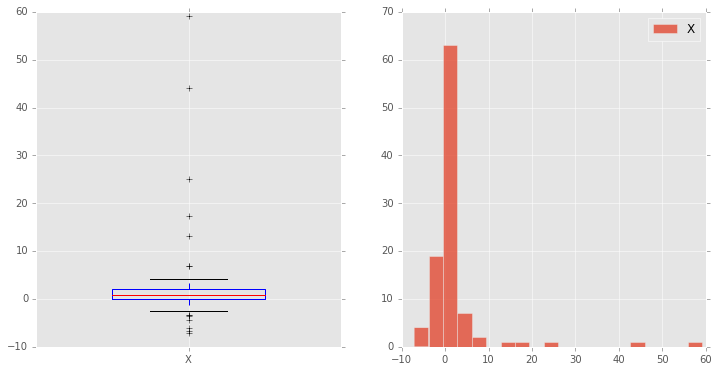

In [43]:
df = N - 1
plot_dignostics_onesample(X)
se = np.std(X, ddof=1)   # unbiased standard error, estimated from sample.
m = tscore(alpha/2, df)      # confidence margin determined by confidence level.

# test statistics
T = (np.mean(X) - mu0)/se

print('Test statistics T: %8.5f and P-vale %10.8f' % (T, p_value(T, df)))
print('Observed mean: %8.5f, 95%% Confidence Interval for keeping H0: [%8.5f , %8.5f]'%
      (np.mean(X), mu0-m*se, mu0 + m*se))
if p_value(T, df)<0.05 and np.abs(np.mean(X)-mu0)>m*se:
    print('Reject null hypothesis at 95% confidence')
else:
    print('Fail to reject null hypothesis at 95% confidence')

We can see the heavy tail of sample prevented $t$-test to reject the null when the true distribution is centered at 1 instead of 0 in this case.

#### Now let's perform a Wilcoxon sign rank test.

In [72]:
# T: W_{+} test statistics.
T, pvalue = scipy.stats.wilcoxon(X, zero_method='wilcox', correction=False)
print('Test statistics T: %8.5f and P-vale %10.8f' % (T, pvalue))
if pvalue<0.05:
    print('Reject null hypothesis at 95% confidence')
else:
    print('Fail to reject null hypothesis at 95% confidence')

Test statistics T: 1417.00000 and P-vale 0.00013916
Reject null hypothesis at 95% confidence


We can see Wilcoxon sign rank test __successfully rejects__ the null hypothesis. One thing to note is that while wilcoxon sign rank test did help us to reject the null hypothesis, it doesn't tell us where the true center is.

### 3.2 Example: Wilcoxon sign rank test by simulations

In addition to use asymptotic normal distribution of $W_{+}$, we can directly simulate the distribution of $W_{+}$.

In [65]:
M = 10000  # number of samples in the simulation.
# we sort absolute value of 
X_abs = np.sort(abs(X))
Ts    = np.zeros((M, ))
for i in range(M):
    # randome generate the sign of the sample.
    rand_sign = np.sign(np.random.rand(N)-0.5)
    Ts[i], _= scipy.stats.wilcoxon(X_abs*rand_sign, zero_method='wilcox', correction=False)
    if (i+1)%round(M/10)==0:
        print('%%%3d finished'%((i+1)/round(M/10)*10))

% 10 finished
% 20 finished
% 30 finished
% 40 finished
% 50 finished
% 60 finished
% 70 finished
% 80 finished
% 90 finished
%100 finished


Test statistics T:  1417 and P-vale  0.00010
Reject null hypothesis at 95% confidence


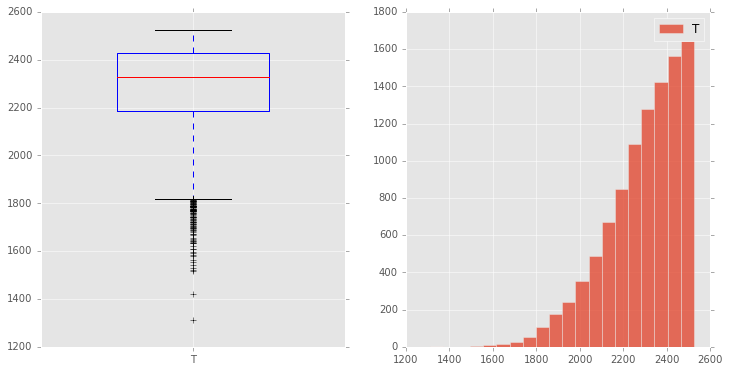

In [71]:
plot_dignostics_onesample(Ts,labels=['T'])
pvalue = np.mean(Ts<T)
print('Test statistics T: %5d and P-vale %8.5f' % (T, pvalue))
if pvalue<0.05:
    print('Reject null hypothesis at 95% confidence')
else:
    print('Fail to reject null hypothesis at 95% confidence')

## 4. Rank sum test

Rank sum test extends the idea of converting observed data values to just their ranks to the two sample setting, so as to deal with heavy-tailed data and deviations from normality. Consider two independent samples $X_1, X_2, ..., X_n \sim f$ and $Y_1, Y_2, ..., Y_m \sim g$, where $f$ and $g$ are two arbitrary PDFS, the testing problem is:
$H_0: f=g$ and $H_1: f \text{ stochastically dominates } g$.

The __rank-sum statistic__ $T_Y$ is defined as follows:
1. Consider the __pooled sample__ of all observations $X_1, X_2, ..., X_n, Y_1, Y_2, ..., Y_m$. Sort these $m+n$ values in increasing order. Assign the smallest a rank of 1, the next smallest a rank of 2, etc., and the largest a rank of $m+n$.
2. Define $T_Y$ as the sum of the ranks corresponding to only the $Y_i$ values, i.e. the values from only the second sample.

We expect $T_Y$ to be smaller under $H_1$ than under $H_0$, because under $H_1$ the values of $Y_i$ tend to have smaller ranks. The test rejects for small values of $T_Y$ is called the __Wilcoxon rank-sum test__, known alternatively as the Mann-Whitney U-test or the Mann-Whiney-Wilcoxon test. If we are testing a general two-sided alternative: $H_1^{\prime}: f\neq g$, then we would reject for both large and small values of $T_Y$.

__Theorem__: _The distribution of $T_Y$ is the same under any PDF f=g. For large n and m, this distribution is approximately $N(\frac{m(m+n+1)}{2}, \frac{mn(m+n+1)}{12})$_.

<font color='red'>__Note:__</font><br>
The main idea behind the (one-sample) signed-rank test and the (two-sample) rank-sum test is to exploit a symmetry under $H_0$. For the signed-rank test, the symmetry is that it is equally likely to observe $\pm X_1, ..., \pm X_n$ for each $2^n$ combinations of $+/-$ signs. For the rank-sum test, the symmetry is that it is equally likely to observe each of the $(m+n)!$ permutations of the pooled sample $X_1, ..., X_n, Y_1, ..., Y_m$.

### Example 4.1
Let's use rank sum test to check if a t-distribution and normal distribution are the same.

array([ 20,  40,  60,  80, 100, 119, 139, 159, 179])

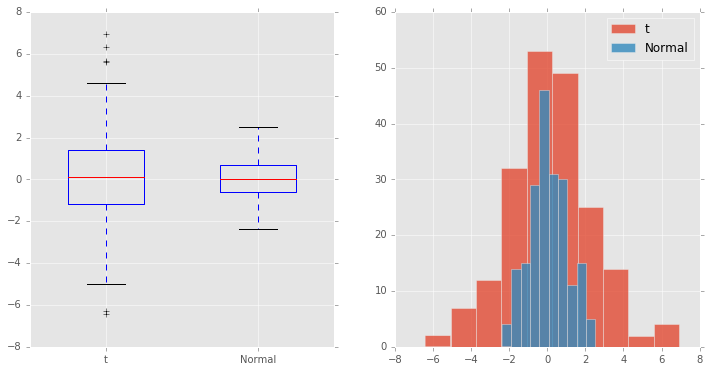

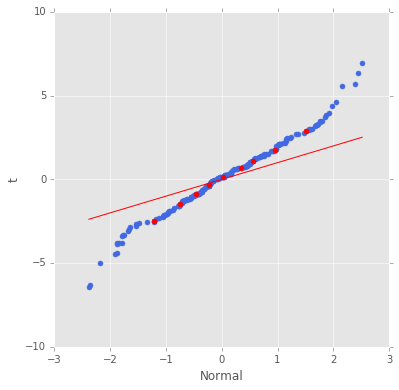

In [148]:
N = 200
sigma = 2
df    = 5
mu    = 0
# generate samples from a t-distribution with dof=nu
X     = scipy.stats.t.rvs(df, loc=mu, size=N, scale=2)

# generate samples from a normal distribution
Xn     = scipy.stats.norm.rvs(size=N)
plot_dignostics_twosample(X,Xn,['t','Normal'])

# Q-Q plot
index = np.round(np.linspace(0, N-1, 11)[1:10]).astype('int')
plt.figure(figsize=(6,6))
plt.plot(np.sort(Xn),np.sort(X),'.',color='royalblue',markersize=10)
plt.plot(np.sort(Xn),np.sort(Xn),'r-')
plt.plot(np.sort(Xn)[index],np.sort(X)[index],'.',color='red',markersize=10)
plt.ylim([-10,10])
plt.xlabel('Normal')
plt.ylabel('t')

#### Now, let's perform a rank sum test.

In [180]:
T, pvalue = scipy.stats.ranksums(Xn, X)
T, pvalue

(-0.58383780585120315, 0.55932944010045116)

We can clearly see that if we reject the null hypothesis we are confident that $f\neq g$. However, when we fail to reject the null hypothesis. We cannot really say anything. Both $f=g$ and $f \neq g$ are possible.

In addition to using asyptotic normality assumption to calculate the test statistics p value, we also use simulation. Under null hypothesis, $Y_1, ..., Y_m$ are equality likely to be present in any permutation of $m+n$ samples. Let's run a simulation where we randomly pick $m$ ranks from $1$ to $m+n$ without replacement.

In [251]:
M        = 50000
ranksum  = np.zeros((M,))
import time
t0 = time.time()
for i in range(M):
    ranksum[i]=np.sum(np.random.choice(N + N, size = N, replace=False)+1)
    if (i+1)%round(M/10)==0:
        print('%%%3d finished'%((i+1)/round(M/10)*10))
        print('Time Elapse: %8.5f sec'%(time.time()-t0))

# calculate the rank_sum in our sample
X_mark         = sorted(zip(list(X) + list(Xn), ['X']*N + ['Xn']*N))
ranks_obs_X    = [i+1 for i, x in enumerate(X_mark) if x[1]=='X']
ranks_obs_Xn   = [i+1 for i, x in enumerate(X_mark) if x[1]=='Xn']
ranksum_obs_X  = sum(ranks_obs_X)
ranksum_obs_Xn = sum(ranks_obs_Xn)

# if we are conducting a two tail test, we need to multiple one tail pvalue by 2.
pvalue_sim     = min([np.mean(ranksum>ranksum_obs_X), np.mean(ranksum<ranksum_obs_X)])*2
if pvalue_sim<0.05:
    print('pvalue = %8.5f. Reject null hypothesis at 95%% confidence.' %(pvalue_sim))
else:
    print('pvalue = %8.5f. Fail to reject null hypothesis at 95%% confidence.'%(pvalue_sim))
# plot_dignostics_onesample(ranksum)

% 10 finished
Time Elapse:  0.24698 sec
% 20 finished
Time Elapse:  0.46001 sec
% 30 finished
Time Elapse:  0.71190 sec
% 40 finished
Time Elapse:  1.07077 sec
% 50 finished
Time Elapse:  1.40566 sec
% 60 finished
Time Elapse:  1.76662 sec
% 70 finished
Time Elapse:  2.07579 sec
% 80 finished
Time Elapse:  2.30108 sec
% 90 finished
Time Elapse:  2.52481 sec
%100 finished
Time Elapse:  2.77766 sec
pvalue =  0.55712. Fail to reject null hypothesis at 95% confidence.


Again, we cannot really say anything when we fail to reject the null. Both $f=g$ and $f \neq g$ are possible. In some cases, it's better to do an regression instead of a hypothesis test on the distribution itself. In that case, a test of goodness of fit can be used.

## 5. Permutation test

Permutation test explores the symmetry and provides an alternative (and useful) simulation-based method of obtaining a null distribution for _any_ test statistic $T$ for these problems.

Consider two samples $X_1, ..., X_n$ and $Y_1, ..., Y_m$, and any test statistic $T(X_1, ..., X_n, Y_1, ..., Y_m)$ (for example $T=\bar{X}-\bar{Y}$). For a null hypothesis $H_0$ which specifies that all data from both samples are IID from a common distribution, for example: $H_0: X_1, ..., X_n, Y_1, ..., Y_m \sim f$ for an _unknown_ PDF $f$. Under the null hypothesis, then the $(m+n)!$ possible permutation of $X_1, ..., X_n, Y_1, ..., Y_m$ are equally likely to appear. Thus, we can build up the null distribution of $T$ by calculated by perform a simulation (or a exhaustive calculation for small samples) of T of random permutation of the two $X_1, ..., X_n, Y_1, ..., Y_m$. We calculate approximate $p$-value as the fraction of permutations where we obtained a value of T larger than $t_{obs}$, the value for the original (unpermuted) data (Reject at level-$\alpha$ if this $p$-value is at most $\alpha$). 

For a two-sided test that rejects for both large and small values of $T$, we can compute the $p$-value by taking the fraction of simulations where $T$ is larger than $t_{obs}$ or the fraction where $T$ is smaller than $t_{obs}$ (whichever is smaller) and multiply by 2.

### Example 5.1
Two samples are draw from $t$-distribution with same mean but different variance. Use permutation test to test against a null hypothesis that the two samples follow the same distribution.

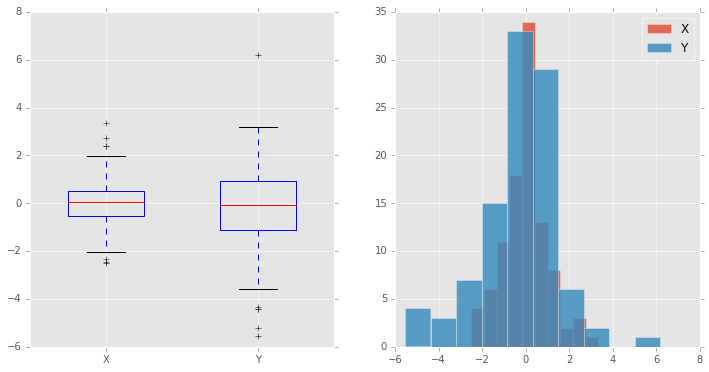

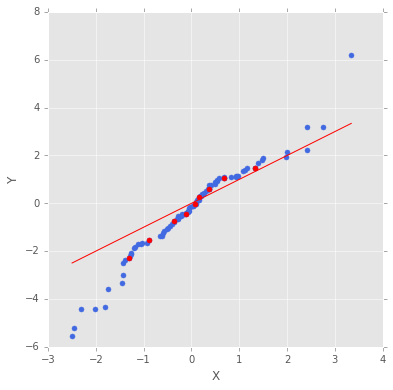

In [303]:
n    = 100
m    = 100
dfx  = 5
mux  = 0
scalex = 1.0
scaley = 1.2
dfy  = 5
muy  = 0

# generate samples from a t-distribution with dof=nu
X     = scipy.stats.t.rvs(dfx, loc=mux, size=n, scale=scalex)
Y     = scipy.stats.t.rvs(dfy, loc=muy, size=m, scale=scaley)

def std_diff(XY,n,m):
    return np.std(XY[:n])-np.std(XY[-m:])
plot_dignostics_twosample(X,Y,['X','Y'])

def qqplot(X,Y):
    N = len(X)
    index = np.round(np.linspace(0, N-1, 11)[1:10]).astype('int')
    plt.figure(figsize=(6,6))
    plt.plot(np.sort(X),np.sort(Y),'.',color='royalblue',markersize=10)
    plt.plot(np.sort(X),np.sort(X),'r-')
    plt.plot(np.sort(X)[index],np.sort(Y)[index],'.',color='red',markersize=10)
    plt.xlabel('X')
    plt.ylabel('Y')
qqplot(X,Y)

Let's assume that we know both X and Y has zero mean and we want to test if X and Y has the standard deviation.

% 10 finished
Time Elapse:  0.78836 sec
% 20 finished
Time Elapse:  1.52310 sec
% 30 finished
Time Elapse:  2.25162 sec
% 40 finished
Time Elapse:  2.99985 sec
% 50 finished
Time Elapse:  3.72141 sec
% 60 finished
Time Elapse:  4.52506 sec
% 70 finished
Time Elapse:  5.30946 sec
% 80 finished
Time Elapse:  6.06141 sec
% 90 finished
Time Elapse:  6.86819 sec
%100 finished
Time Elapse:  7.73360 sec
pvalue =  0.00072. Reject null hypothesis at 95% confidence.
Observed statistic t_obs: -0.71956


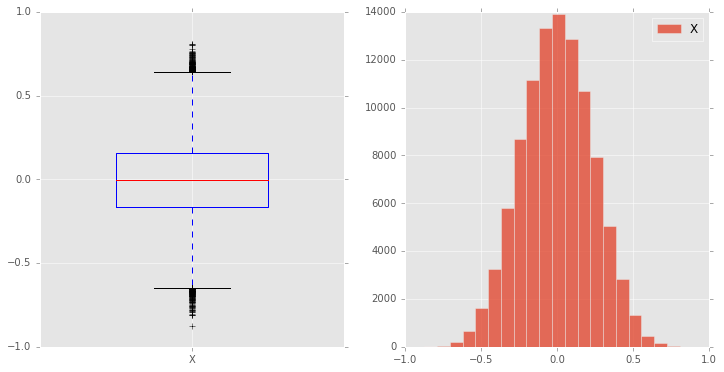

In [304]:
M     = 100000 # number of simulation
XY    = np.concatenate([X, Y])
T     = np.zeros((M,))
t_obs = std_diff(XY,n,m)
t0 = time.time()
for i in range(M):
    index = list(range(XY.size))
    np.random.shuffle(index)
    T[i] = std_diff(XY[index],n,m)
    if (i+1)%round(M/10)==0:
        print('%%%3d finished'%((i+1)/round(M/10)*10))
        print('Time Elapse: %8.5f sec'%(time.time()-t0))

plot_dignostics_onesample(T)

pvalue  = min([np.mean(T>t_obs), np.mean(T<t_obs)])*2
if pvalue<0.05:
    print('pvalue = %8.5f. Reject null hypothesis at 95%% confidence.' %(pvalue))
else:
    print('pvalue = %8.5f. Fail to reject null hypothesis at 95%% confidence.'%(pvalue))

print('Observed statistic t_obs: %8.5f'%(t_obs))

In fact, permutation test can be applied to broader settings where it may be difficult to understand theoretically the distribution of test statistic. In general, the test statistics should not depend on the permutation of the sample itself under the assumption of null hypothesis. Therefore, extreme values of test statistics act as evidence against null hypothesis.